In [1]:
import joblib

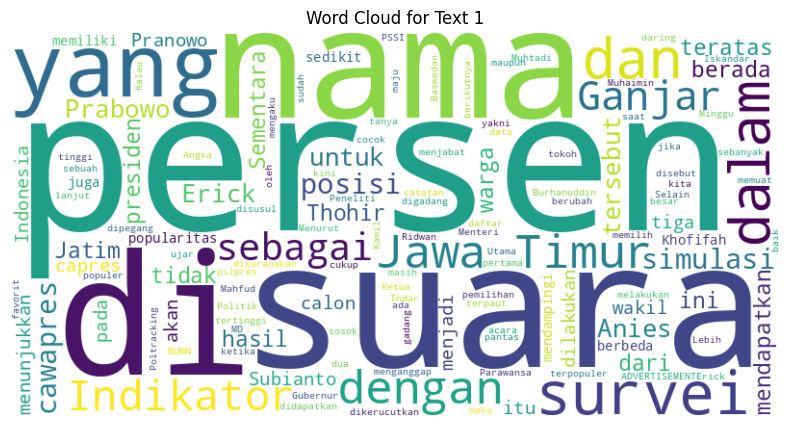

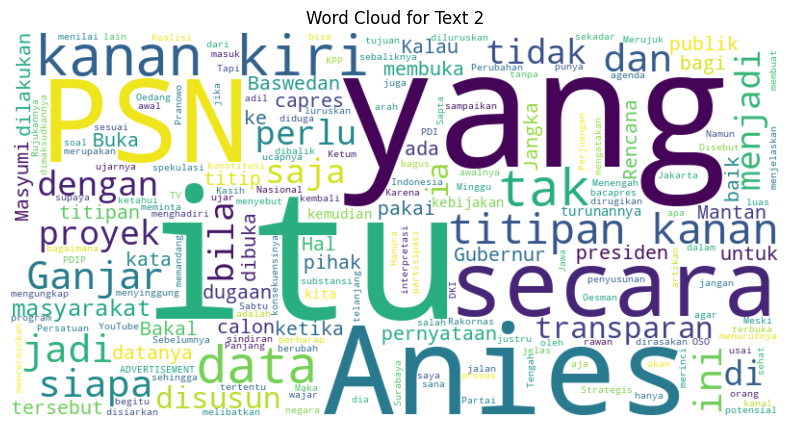

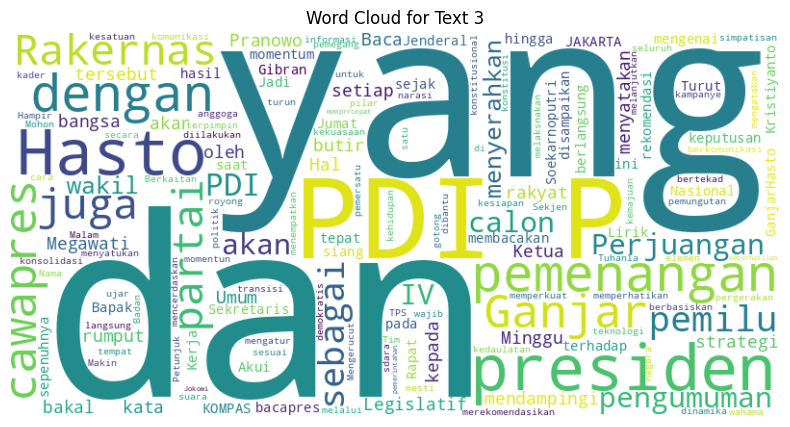

In [2]:
import joblib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the model data from the file
loaded_model_data = joblib.load('model_sentimen_lr.pkl')

# Extract model, vectorizer, and label encoder from loaded data
loaded_model = loaded_model_data['model']
loaded_vectorizer = loaded_model_data['vectorizer']
loaded_label_encoder = loaded_model_data['label_encoder']

new_data = [
    """Hasil survei Indikator Politik Indonesia menunjukkan Ganjar Pranowo dan Erick Thohir sebagai calon presiden dan calon wakil presiden terpopuler di Jawa Timur."Kalau kita tanya dari simulasi 24 nama, 38,6 persen warga Jatim mengaku akan memilih Ganjar. Prabowo Subianto 28,2 persen, Anies 11,2 persen," ujar Burhanuddin Muhtadi, Peneliti Utama Indikator dalam sebuah acara daring, Minggu (1/10).Posisi tersebut tidak berubah ketika nama capres dikerucutkan menjadi tiga nama besar yang saat ini digadang-gadang akan maju pada pemilihan presiden (pilpres) 2024.Menurut hasil survei Indikator, jika simulasi dilakukan untuk tiga nama teratas, maka Ganjar Pranowo mendapatkan suara sebanyak 43,9 persen, Prabowo Subianto mendapatkan suara 33,8 persen, dan Anies Baswedan mendapatkan suara 14,4 persen.Sementara itu, popularitas tertinggi untuk cawapres dipegang oleh Erick Thohir yang kini menjabat sebagai Menteri BUMN dan Ketua PSSI.ADVERTISEMENTErick disebut memiliki popularitas yang cukup tinggi di Jawa Timur dengan 17,2 persen suara. Angka tersebut terpaut sedikit dengan suara yang didapatkan Gubernur Jawa Timur Khofifah Indar Parawansa, yakni 15,1 persen.Selain dua nama tersebut, warga Jawa Timur juga memuat nama Mahfud MD dan Ridwan Kamil dalam daftar teratas tokoh yang pantas menjadi cawapres.Sebagai catatan, hasil ini dilakukan dalam simulasi 19 nama cawapres.Lebih lanjut, survei Indikator juga menunjukkan warga Jatim menganggap Erick Thohir sebagai sosok yang cocok untuk mendampingi baik Ganjar maupun Prabowo dari 13 nama yang ada dalam simulasi.Indikator tidak melakukan survei untuk cawapres yang mendampingi Anies dikarenakan sudah memiliki Muhaimin Iskandar sebagai wakil.Sedikit berbeda, dalam data survei dari Poltracking Indonesia, Khofifah berada di posisi pertama cawapres favorit di Jawa Timur dengan 18,6 persen suara. Sementara Erick berada di posisi berikutnya dengan 18,3 persen suara dalam simulasi 10 nama di survei tersebut.Sementara itu, posisi capres populer di Jawa Timur tidak berbeda pada survei ini. Ganjar masih berada di posisi teratas di Jatim dengan 36,1 persen suara, disusul Prabowo dengan 25,5 persen suara, dan Anies 19,6 persen suara.""",
    """Bakal calon presiden (capres) dari PDI Perjuangan (PDIP) Ganjar Pranowo, meminta bacapres Koalisi Perubahan untuk Persatuan (KPP) Anies Baswedan untuk membuka data dibalik pernyataan Proyek Strategis Nasional (PSN) yang jadi titipan kanan-kiri."Yang titip siapa? Kanan-kiri itu siapa? Disebut saja datanya secara terbuka, yang titip siapa? pakai data," kata Ganjar usai jalan sehat dengan Ketum Hanura Oesman Sapta Oedang (OSO) di Surabaya, Minggu (1/10).Ganjar menyebut, pernyataan Anies itu rawan di salah artikan. Maka itu menurutnya, Mantan Gubernur DKI Jakarta itu perlu membuka data yang jelas."Kalau pakai data tidak akan membuat orang punya interpretasi lain. Kasih aja datanya, dibuka telanjang, itu bagus," ujarnya.Ganjar yang juga mantan Gubernur Jawa Tengah ini berharap sindiran Anies soal PSN jadi titipan kanan-kiri itu dibuka secara luas ke publik agar tak hanya jadi sekadar dugaan.ADVERTISEMENT"Buka saja, dugaan saya tidak (ada) yang bisa mengungkap data itu. Buka saja jangan spekulasi," ucapnya.Sebelumnya Bakal calon presiden (Capres) Anies Baswedan menyinggung PSN diduga menjadi titipan pihak-pihak tertentu bila penyusunan proyek tersebut tak dilakukan secara transparan.Hal ini ia sampaikan ketika menghadiri agenda Rakornas Partai Masyumi yang disiarkan di kanal YouTube Masyumi TV, Sabtu (30/9).Anies awalnya menjelaskan PSN secara substansi merupakan hal wajar dan baik bagi negara bila disusun secara transparan dan melibatkan partisipasi publik. Namun sebaliknya, ia menilai PSN potensial berubah menjadi tidak adil bagi masyarakat jika tak disusun secara transparan."Rujukannya Rencana Jangka Panjang, turunannya Rencana Jangka Menengah, dan turunannya kemudian PSN. Merujuk ke sana. Tapi kalau itu tak dilakukan dengan baik, PSN itu kemudian jadi titipan kanan kiri yang masuk tanpa kita ketahui bagaimana proses itu disusun," kata Anies.Meski begitu, Anies tak merinci titipan kanan-kiri siapa yang dimaksudkannya tersebut.Anies mengatakan bila ada titipan dalam proyek itu justru yang dirugikan adalah masyarakat. Karena itu, ia memandang program ini perlu diluruskan supaya sesuai dengan arah konstitusi Indonesia."Dan ketika titipan kanan-kiri, konsekuensinya dirasakan oleh masyarakat. Ini kita kembali perlu luruskan, sehingga apa yang menjadi kebijakan-kebijakan itu mencerminkan tujuan awal," ujar dia.""",
    """JAKARTA, KOMPAS.com - PDI Perjuangan menyerahkan keputusan mengenai pengumuman calon wakil presiden (cawapres) yang akan mendampingi bakal calon presiden (bacapres) Ganjar Pranowo kepada Ketua Umum PDI-P Megawati Soekarnoputri.Hal ini disampaikan Sekretaris Jenderal PDI-P Hasto Kristiyanto saat membacakan butir-butir rekomendasi hasil Rapat Kerja Nasional (Rakernas) IV PDI-P yang berlangsung sejak Jumat (29/9/2023) hingga Minggu (1/10/2023)."Rakernas IV partai menyerahkan sepenuhnya kepada Ketua Umum PDI Perjuangan terhadap pengumuman calon wakil presiden yang akan mendampingi Bapak Ganjar Pranowo pada momentum yang tepat," kata Hasto, Minggu siang.Baca juga: Hasto Akui PDI-P Turut Lirik Gibran Jadi Cawapres GanjarHasto menyatakan, pengumuman cawapres Ganjar akan memperhatikan dinamika politik, pergerakan 3 pilar partai di akar rumput, kesiapan Badan Pemenangan Pemilu Legislatif, dan konsolidasi Tim Pemenangan Presiden.Rakernas IV PDI-P juga merekomendasikan strategi pemenangan pemilu dengan cara gotong royong yang terpimpin berbasiskan tempat pemungutan suara (TPS).Hasto menyatakan, strategi tersebut mesti diilakukan oleh seluruh elemen partai dengan menyatukan pemenangan legislatif dan presiden sebagai satu kesatuan pemenangan."Berkaitan dengan hal tersebut, setiap anggoga, kader dan simpatisan partai wajib turun dan memperkuat akar rumput, berkomunikasi secara langsung dengan rakyat dan dibantu oleh teknologi informasi dan komunikasi," ujar Hasto.Baca juga: Nama Bakal Cawapres Ganjar Makin Mengerucut, Sekjen PDI-P: Megawati Hampir Setiap Malam Mohon Petunjuk TuhanIa mengatakan, Rakernas PDI-P juga menempatkan rakyat sebagai pemegang kedaulatan negara, sesuai konstitusi yang mengatur pemilu sebagai momentun transisi kekuasaan sdara konstitusional dan demokratis."PDI Perjuangan bertekad untuk melaksnakan pemilu sebagai wahama pemersatu bangsa, melalui kampanye yang mencerdaskan kehidupan bangsa dengan narasi kemajuan, melanjutkan dan memprrcepat keberhasilan pemerintahan Presiden Jokowi," kata Hasto."""
]

# Create word clouds for each text without preprocessing
for i, text in enumerate(new_data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Text {i+1}")
    plt.show()


In [3]:
# Vectorize the new data using the loaded CountVectorizer
new_data_features = loaded_vectorizer.transform(new_data)

# Predict sentiment using the loaded model
predictions = loaded_model.predict(new_data_features)

# Decode numerical labels back to text labels using the loaded LabelEncoder
predicted_sentiments = loaded_label_encoder.inverse_transform(predictions)

# Print the predicted sentiments
for text, sentiment in zip(new_data, predicted_sentiments):
    print(f"Text: '{text}' -> Predicted Sentiment: '{sentiment}'")

Text: 'Hasil survei Indikator Politik Indonesia menunjukkan Ganjar Pranowo dan Erick Thohir sebagai calon presiden dan calon wakil presiden terpopuler di Jawa Timur."Kalau kita tanya dari simulasi 24 nama, 38,6 persen warga Jatim mengaku akan memilih Ganjar. Prabowo Subianto 28,2 persen, Anies 11,2 persen," ujar Burhanuddin Muhtadi, Peneliti Utama Indikator dalam sebuah acara daring, Minggu (1/10).Posisi tersebut tidak berubah ketika nama capres dikerucutkan menjadi tiga nama besar yang saat ini digadang-gadang akan maju pada pemilihan presiden (pilpres) 2024.Menurut hasil survei Indikator, jika simulasi dilakukan untuk tiga nama teratas, maka Ganjar Pranowo mendapatkan suara sebanyak 43,9 persen, Prabowo Subianto mendapatkan suara 33,8 persen, dan Anies Baswedan mendapatkan suara 14,4 persen.Sementara itu, popularitas tertinggi untuk cawapres dipegang oleh Erick Thohir yang kini menjabat sebagai Menteri BUMN dan Ketua PSSI.ADVERTISEMENTErick disebut memiliki popularitas yang cukup tin